# Assignment 2

Adam McDaniel, Elias Kokkas, and Gaddy Morales

## Collect Files And Setup for Binning 

In [37]:
import os
import cv2
import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

ROOT_DIR = './train'

WINDOW = None
TIME_BIN_COUNT = 6
FREQUENCY_BIN_COUNT = 6
BIN_SHAPE = (TIME_BIN_COUNT, FREQUENCY_BIN_COUNT)

def bin_a_wav(wav_path: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window=None, fft_size: int = None) -> np.ndarray:
    '''
    Bins a wave file into a 2D vector of shape (freq_bin_count, time_bin_count).
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=None)

    if not fft_size:
        fft_size = len(samples)

    # Get the frequency, time, and spectrogram of the wav file
    f, t, pxx = signal.spectrogram(
        samples,
        nperseg=fft_size,
        fs=1 / sampling_rate,
        noverlap=fft_size/2,
        **{} if window is None else dict(window=window)
    )
    # Resize the spectrogram to the desired shape (time_bin_count, freq_bin_count)
    data = np.log10(cv2.resize(pxx[:,:], (time_bin_count, freq_bin_count)))
    return data

# Get the list of all the wav files for each class
music_files      = [f'{ROOT_DIR}/music/{f}' for f in os.listdir(f'{ROOT_DIR}/music')[:20]]
print('Collected music files')
vacuum_files     = [f'{ROOT_DIR}/vacuum/{f}' for f in os.listdir(f'{ROOT_DIR}/vacuum')[:20]]
print('Collected vacuum files')
blender_files    = [f'{ROOT_DIR}/blender/{f}' for f in os.listdir(f'{ROOT_DIR}/blender')[:20]]
print('Collected blender files')
silence_files    = [f'{ROOT_DIR}/silence/{f}' for f in os.listdir(f'{ROOT_DIR}/silence')[:20]]
print('Collected silence files')
microwave_files  = [f'{ROOT_DIR}/microwave/{f}' for f in os.listdir(f'{ROOT_DIR}/microwave')[:20]]
print('Collected microwave files')
fire_alarm_files = [f'{ROOT_DIR}/fire alarm/{f}' for f in os.listdir(f'{ROOT_DIR}/fire alarm')[:20]]
print('Collected fire alarm files')

print('Done👍')

Collected music files
Collected vacuum files
Collected blender files
Collected silence files
Collected microwave files
Collected fire alarm files
Done👍


## Bin The Data (Using Whole Recording as Window)

In [38]:
# Bin the wav files
music_bins      = [bin_a_wav(f) for f in music_files]
print('Binned music files')
vacuum_bins     = [bin_a_wav(f) for f in vacuum_files]
print('Binned vacuum files')
blender_bins    = [bin_a_wav(f) for f in blender_files]
print('Binned blender files')
silence_bins    = [bin_a_wav(f) for f in silence_files]
print('Binned silence files')
microwave_bins  = [bin_a_wav(f) for f in microwave_files]
print('Binned microwave files')
fire_alarm_bins = [bin_a_wav(f) for f in fire_alarm_files]
print('Binned fire alarm files')

# Confirm that the shape of the binned data is correct
assert len(music_bins) == 20, "music_bins shape is wrong, maybe you're missing music files?"
assert len(vacuum_bins) == 20, "vacuum_bins shape is wrong, maybe you're missing vacuum files?"
assert len(blender_bins) == 20, "blender_bins shape is wrong, maybe you're missing blender files?"
assert len(silence_bins) == 20, "silence_bins shape is wrong, maybe you're missing silence files?"
assert len(microwave_bins) == 20, "microwave_bins shape is wrong, maybe you're missing microwave files?"
assert len(fire_alarm_bins) == 20, "fire_alarm_bins shape is wrong, maybe you're missing fire alarm files?"

print('Done👍')

Binned music files
Binned vacuum files
Binned blender files
Binned silence files
Binned microwave files
Binned fire alarm files
Done👍


## Graph Binned Spectrograms

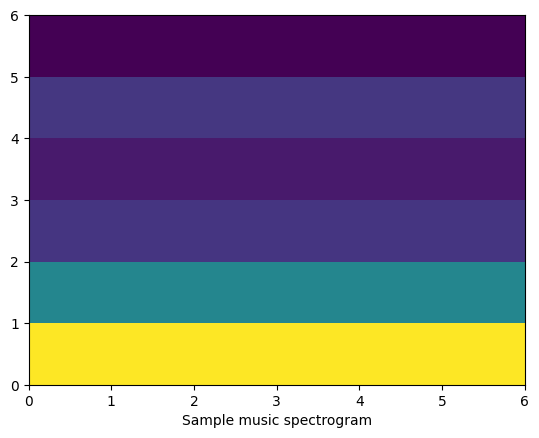

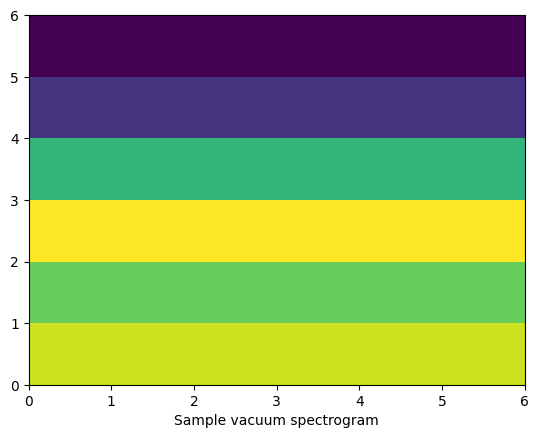

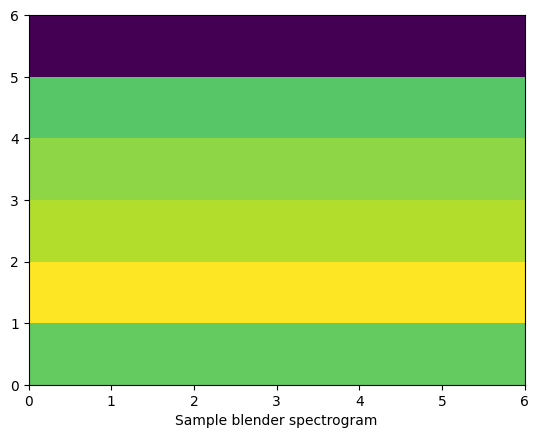

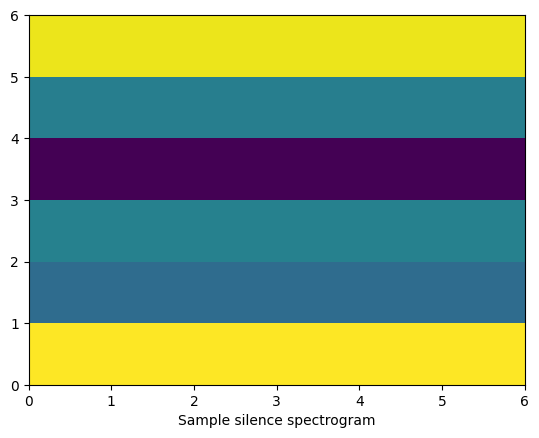

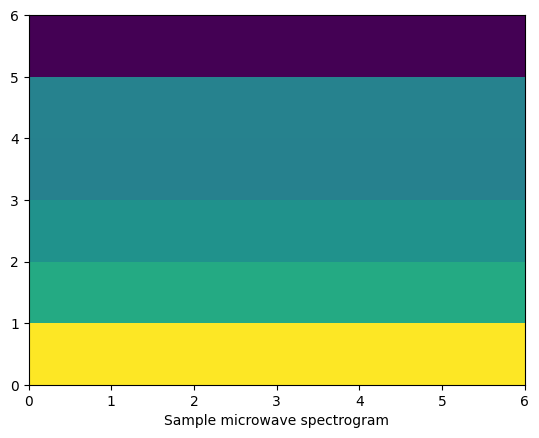

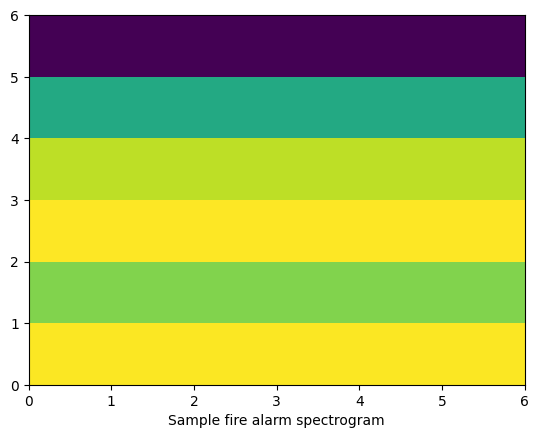

In [39]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample music spectrogram")
plt.pcolormesh(music_bins[0])
plt.show()
plt.xlabel("Sample vacuum spectrogram")
plt.pcolormesh(vacuum_bins[0])
plt.show()
plt.xlabel("Sample blender spectrogram")
plt.pcolormesh(blender_bins[0])
plt.show()
plt.xlabel("Sample silence spectrogram")
plt.pcolormesh(silence_bins[0])
plt.show()
plt.xlabel("Sample microwave spectrogram")
plt.pcolormesh(microwave_bins[0])
plt.show()
plt.xlabel("Sample fire alarm spectrogram")
plt.pcolormesh(fire_alarm_bins[0])
plt.show()

## Extract Domain Specific Features or Use Bins as Features
To extract domain specific features instead of using bins, run the next code block and redefine `featurize` with the proper definition.

In [40]:
def featurize(bins: np.ndarray) -> np.ndarray:
    '''
    Featurizes a 2D binned spectrogram into a feature vector (by extracting domain specific features).

    Using this definition satisfies the second approach to feature extraction in the assignment.
    '''
    bins = bins.flatten()
    result = np.array([[
        np.mean(bins, axis=0),
        np.std(bins, axis=0),
        np.max(bins, axis=0),
        np.min(bins, axis=0),
        np.var(bins, axis=0),
        np.ptp(bins, axis=0),
        np.median(bins, axis=0),
        np.percentile(bins, 10, axis=0),
        np.percentile(bins, 25, axis=0),
        np.percentile(bins, 75, axis=0),
        np.percentile(bins, 90, axis=0),
    ]])
    return result

print('Using featurization approach #1: extracting domain specific features')
print('Done👍')

Using featurization approach #1: extracting domain specific features
Done👍


To use the whole bin as the features, run the next code block and redefine `featurize` with the proper definition.

In [17]:
def featurize(bins: np.ndarray) -> np.ndarray:
    '''
    Flattens the 2D binned spectrogram into a "feature vector", which is just the contents of the bins.

    Using this definition satisfies the first approach to feature extraction in the assignment.
    '''
    return np.array([bins.flatten()])

print('Using featurization approach #2: each bin as a feature')
print('Done👍')

Using featurization approach #2: each bin as a feature
Done👍


## Create Training Data

In [68]:
# Featurize the binned data
# 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!! Select the featurization approach by running the appropriate definition above !!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 

from sklearn.preprocessing import StandardScaler, normalize
import seaborn

music_features      = np.concatenate([featurize(b) for b in music_bins], axis=0)
print('Created music data')
vacuum_features     = np.concatenate([featurize(b) for b in vacuum_bins], axis=0)
print('Created vacuum data')
blender_features    = np.concatenate([featurize(b) for b in blender_bins], axis=0)
print('Created blender data')
silence_features    = np.concatenate([featurize(b) for b in silence_bins], axis=0)
print('Created silence data')
microwave_features  = np.concatenate([featurize(b) for b in microwave_bins], axis=0)
print('Created microwave data')
fire_alarm_features = np.concatenate([featurize(b) for b in fire_alarm_bins], axis=0)
print('Created fire alarm data')

features = (music_features, vacuum_features, blender_features, silence_features, microwave_features, fire_alarm_features)

# This is the data we will use to train our model
data = np.concatenate(features, axis=0)

print('Created training data')
print('Done👍')

Created music data
Created vacuum data
Created blender data
Created silence data
Created microwave data
Created fire alarm data
Created training data
Done👍


### Graph The Training Data

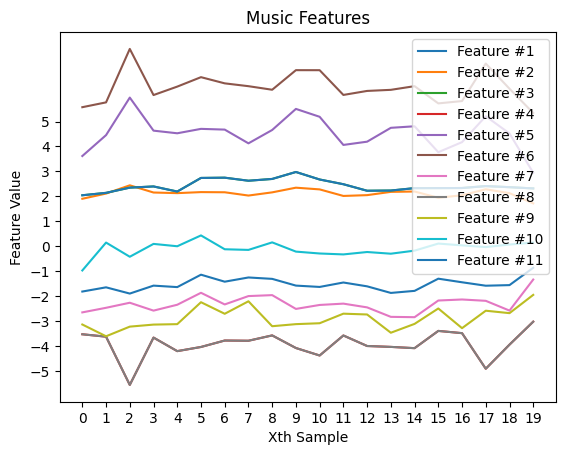

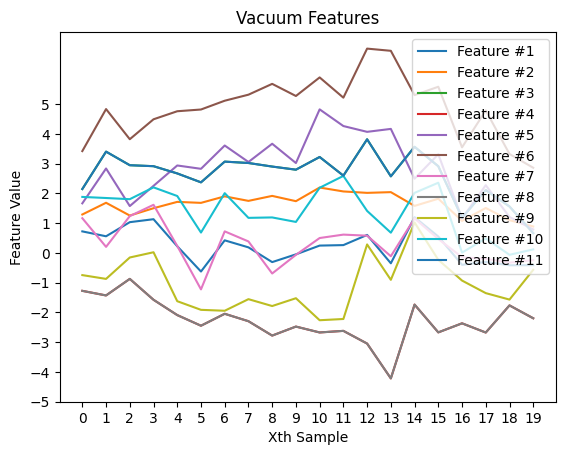

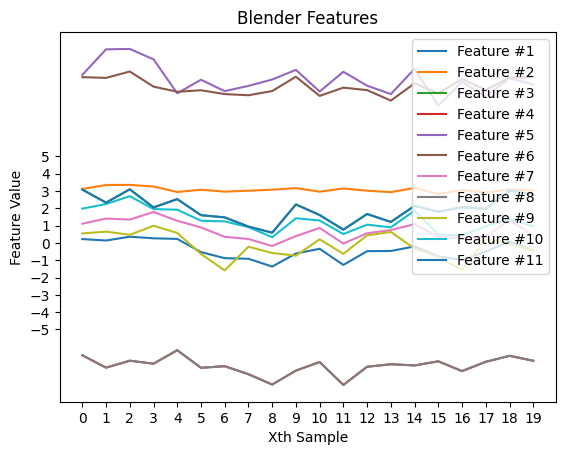

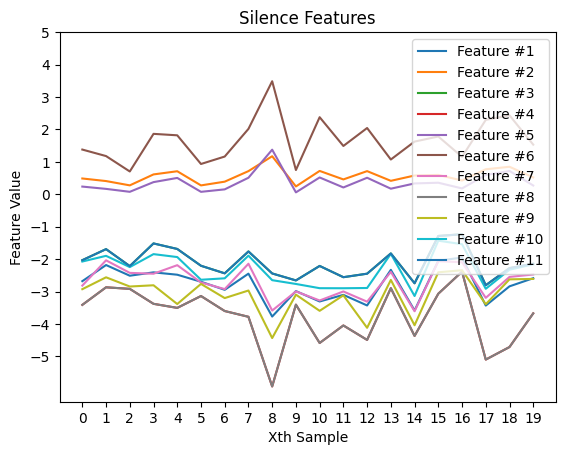

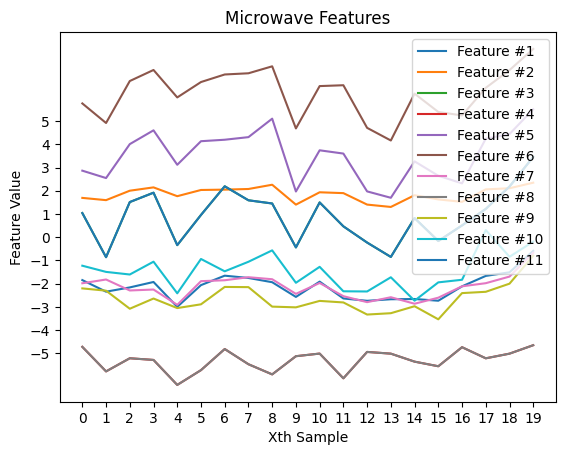

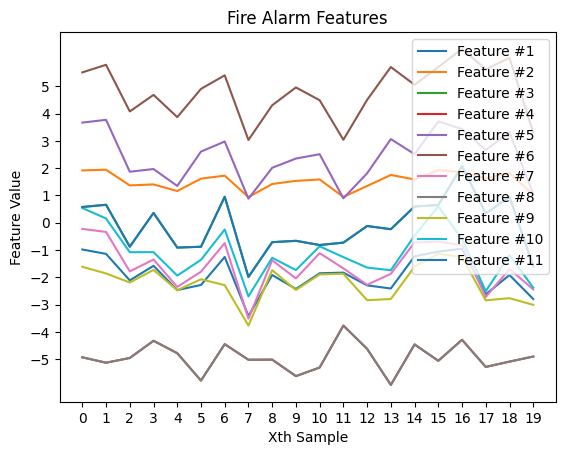

In [77]:
def graph_features(features, titles):
    '''
    Graphs each of the features for each sample of each class.
    '''
    for f, title in zip(features, titles):
        # For each different feature vector list
        plt.title(f'{title.title()} Features')
        # For each sample of features in the feature vector list
        for i in range(f.shape[1]):
            # Get all the values for the feature
            values_for_feature_across_samples = f[:,i]
            
            plt.ylabel('Feature Value')
            plt.xlabel('Xth Sample')
            
            # Plot the feature values for each sample
            line = plt.plot(list(range(20)), values_for_feature_across_samples)
            # Add the line to the legend
            line[0].set_label(f'Feature #{i + 1}')

            # 1 tick on the X axis for each of the 20 files
            plt.xticks(list(range(20)))

            # Calculate the Y ticks on the graph so that
            # The graphs are all the same size, except for graphs with outliers (rare)
            smallest_y_tick = min(-5, np.min(values_for_feature_across_samples))
            largest_y_tick = max(5, np.max(values_for_feature_across_samples))
            plt.yticks(list(range(int(smallest_y_tick), int(largest_y_tick) + 1)))
            
        if f.shape[1] < 18:
            plt.legend(loc=1)
            
        plt.show()

graph_features(features, ['music', 'vacuum', 'blender', 'silence', 'microwave', 'fire alarm'])

## Create Training Labels

In [42]:
# Assign labels to the classes
label_values = {
    'music': 0.0,
    'vacuum': 1.0,
    'blender': 2.0,
    'silence': 3.0,
    'microwave': 4.0,
    'fire alarm': 5.0,
}

# A convenient table to look up the label names from the label values
label_names = {
    0: 'music',
    1: 'vacuum',
    2: 'blender',
    3: 'silence',
    4: 'microwave',
    5: 'fire alarm',
}

#Assigning groundtruth conditions to each participant. 
music_labels      = [label_values['music']] * len(music_features)
print('Created music labels')
vacuum_labels     = [label_values['vacuum']] * len(vacuum_features)
print('Created vacuum labels')
blender_labels    = [label_values['blender']] * len(blender_features)
print('Created blender labels')
silence_labels    = [label_values['silence']] * len(silence_features)
print('Created silence labels')
microwave_labels  = [label_values['microwave']] * len(microwave_features)
print('Created microwave labels')
fire_alarm_labels = [label_values['fire alarm']] * len(fire_alarm_features)
print('Created fire alarm labels')

# This is the ground truth labels for the data
labels = np.concatenate((music_labels, vacuum_labels, blender_labels, silence_labels, microwave_labels, fire_alarm_labels), axis=0)

print('Done👍')

Created music labels
Created vacuum labels
Created blender labels
Created silence labels
Created microwave labels
Created fire alarm labels
Done👍


## Train and Test a Classifier

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.3)

# Create the model
clf = SVC(kernel='poly', degree=5, gamma='auto')
# Train the model
clf.fit(xtrain, ytrain)

# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
print('Confusion Matrix:', cm, '\n', sep='\n')

# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

Average cross-validation score: 0.8819444444444444 

Confusion Matrix:
[[7 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 5 1]
 [0 0 0 1 1 4]]


Test Statistics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00         4
         3.0       0.89      1.00      0.94         8
         4.0       0.83      0.83      0.83         6
         5.0       0.80      0.67      0.73         6

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.91      0.92      0.91        36



Testing Accuracy: 0.9166666666666666
Done👍


## Test Classifier on All Data

In [45]:
def classify(path: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window: tuple[str, float] = None, fft_size: int = None) -> str:
    '''
    Given a path to a wav file, classify it as one of the six classes.
    '''
    # Get the bins for a given wave
    bins = bin_a_wav(path, time_bin_count, freq_bin_count, window, fft_size)
    # Featurize the bins
    features = featurize(bins)
    # Get the prediction
    ypred = clf.predict(features)
    return label_names[int(ypred[0])]

def check_files(files: list[str], expected: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window: tuple[str, float] = None, fft_size: int = None) -> None:
    '''
    Given a list of files and an expected class, check that the classifier
    classifies them as the expected class.
    '''

    symbols = {
        'music': '🎵',
        'vacuum': '🧹',
        'blender': '⚙️',
        'microwave': '📡',
        'fire alarm': '🚨',
        'silence': '🤫'
    }
    predictions = [classify(f, time_bin_count, freq_bin_count, window, fft_size) for f in files]
    print(' '.join([f'{n+1:2}' for n in range(len(files))]))
    for prediction in predictions:
        print(f'{symbols[prediction]} ', end='')
    print()
    for prediction in predictions:
        print('✅' if prediction == expected else '❌', end=' ')
    print('\n', '-' * 60, sep='')


print('Checking music files...')
check_files(music_files, 'music')
print('Checking vacuum files...')
check_files(vacuum_files, 'vacuum')
print('Checking blender files...')
check_files(blender_files, 'blender')
print('Checking silence files...')
check_files(silence_files, 'silence')
print('Checking microwave files...')
check_files(microwave_files, 'microwave')
print('Checking fire alarm files...')
check_files(fire_alarm_files, 'fire alarm')

print('Done👍')

Checking music files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking vacuum files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking blender files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking silence files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking microwave files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 

# Live Demo

In [10]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio
camera = CameraStream(constraints={'audio': True, 'video': False})
recorder = AudioRecorder(stream=camera, filename='recording.mp3', autosave=True)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), autosave=True, filename='recording.mp3', stream=CameraStr…

Recording saved


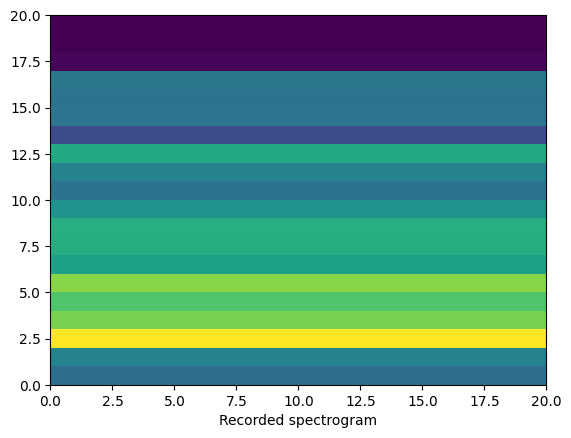

Prediction: fire alarm


In [14]:
recorder.save()
print('Recording saved')
!ffmpeg -i recording.mp3 -ac 1 -f wav livedemo.wav -y -hide_banner -loglevel panic
bins = bin_a_wav('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW)
plt.xlabel("Recorded spectrogram")
plt.pcolormesh(bins)
plt.show()
print('Prediction:', classify('livedemo.wav'))

# Now With Windowing!

## Bin The Data Using Windowing

In [60]:
WINDOW = ('tukey', 0.5)
TIME_BIN_COUNT = 6
FREQUENCY_BIN_COUNT = 6
FFT_SIZE = 128

# Bin the wav files
windowed_music_bins      = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in music_files]
print('Binned windowed music files')
windowed_vacuum_bins     = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in vacuum_files]
print('Binned windowed vacuum files')
windowed_blender_bins    = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in blender_files]
print('Binned windowed blender files')
windowed_silence_bins    = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in silence_files]
print('Binned windowed silence files')
windowed_microwave_bins  = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in microwave_files]
print('Binned windowed microwave files')
windowed_fire_alarm_bins = [bin_a_wav(f, TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE) for f in fire_alarm_files]
print('Binned windowed fire alarm files')
print('Done👍')

Binned windowed music files
Binned windowed vacuum files
Binned windowed blender files
Binned windowed silence files
Binned windowed microwave files
Binned windowed fire alarm files
Done👍


## Graph Binned Spectrograms

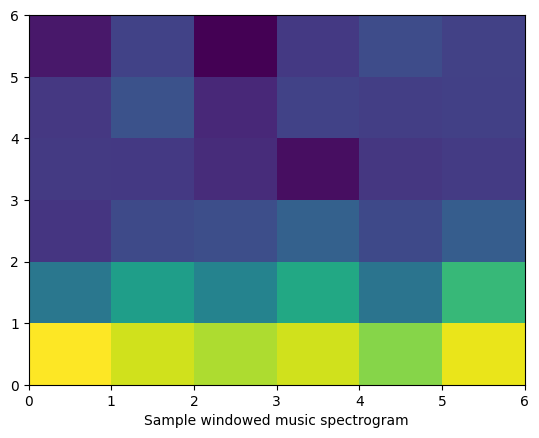

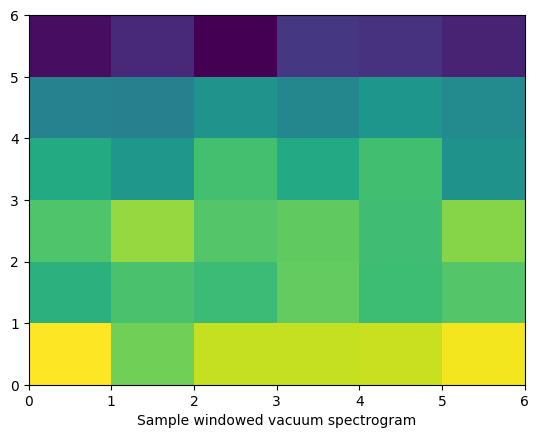

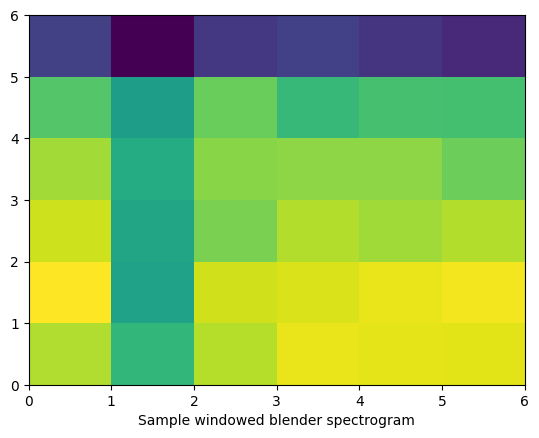

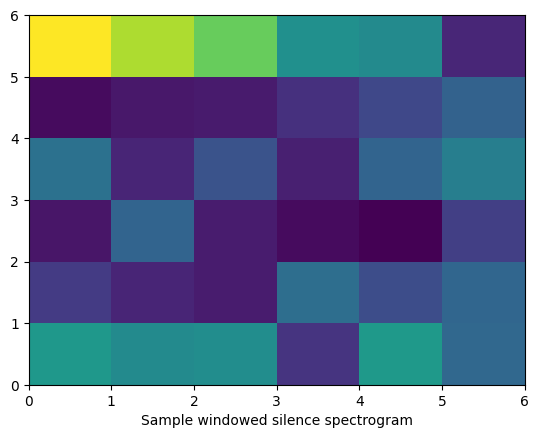

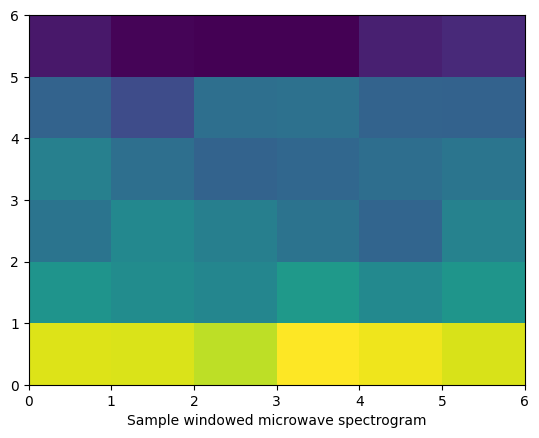

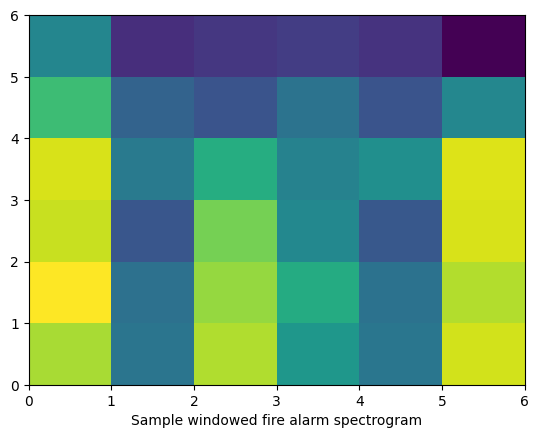

In [61]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample windowed music spectrogram")
plt.pcolormesh(windowed_music_bins[0])
plt.show()
plt.xlabel("Sample windowed vacuum spectrogram")
plt.pcolormesh(windowed_vacuum_bins[0])
plt.show()
plt.xlabel("Sample windowed blender spectrogram")
plt.pcolormesh(windowed_blender_bins[0])
plt.show()
plt.xlabel("Sample windowed silence spectrogram")
plt.pcolormesh(windowed_silence_bins[0])
plt.show()
plt.xlabel("Sample windowed microwave spectrogram")
plt.pcolormesh(windowed_microwave_bins[0])
plt.show()
plt.xlabel("Sample windowed fire alarm spectrogram")
plt.pcolormesh(windowed_fire_alarm_bins[0])
plt.show()

## Create Training Data From Windowed Bins

In [62]:
# Featurize the binned data
# 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!! Select the featurization approach by running the appropriate definition above !!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 

windowed_music_features      = np.concatenate([featurize(b) for b in windowed_music_bins], axis=0)
print('Created windowed music features')
windowed_vacuum_features     = np.concatenate([featurize(b) for b in windowed_vacuum_bins], axis=0)
print('Created windowed vacuum features')
windowed_blender_features    = np.concatenate([featurize(b) for b in windowed_blender_bins], axis=0)
print('Created windowed blender features')
windowed_silence_features    = np.concatenate([featurize(b) for b in windowed_silence_bins], axis=0)
print('Created windowed silence features')
windowed_microwave_features  = np.concatenate([featurize(b) for b in windowed_microwave_bins], axis=0)
print('Created windowed microwave features')
windowed_fire_alarm_features = np.concatenate([featurize(b) for b in windowed_fire_alarm_bins], axis=0)
print('Created windowed fire alarm features')

windowed_features = (windowed_music_features, windowed_vacuum_features, windowed_blender_features, windowed_silence_features, windowed_microwave_features, windowed_fire_alarm_features)

# This is the data we will use to train our model
data = np.concatenate(windowed_features, axis=0)

print('Done👍')

Created windowed music features
Created windowed vacuum features
Created windowed blender features
Created windowed silence features
Created windowed microwave features
Created windowed fire alarm features
Done👍


### Graph The Windowed Training Data

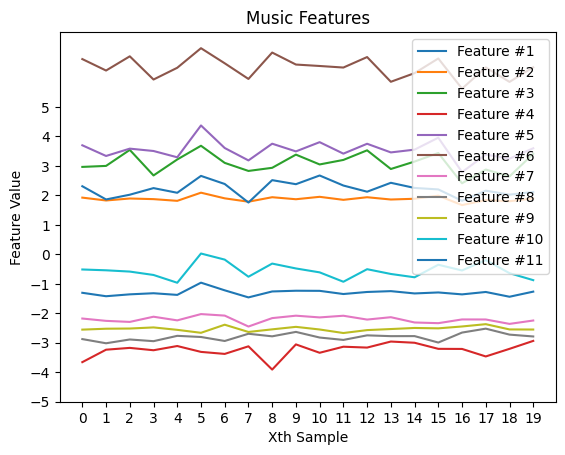

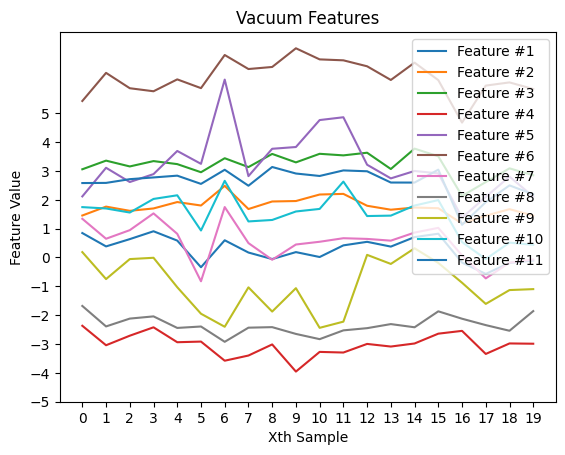

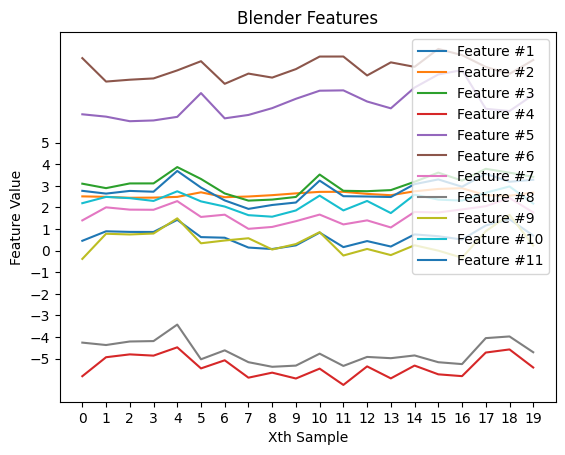

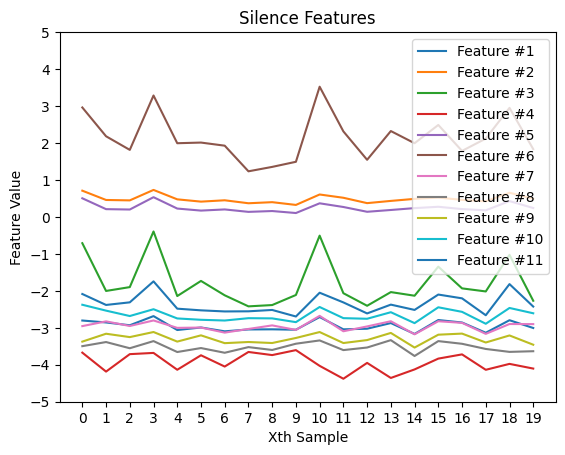

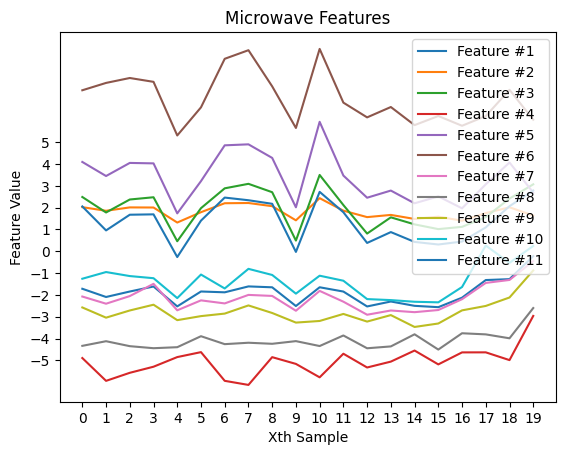

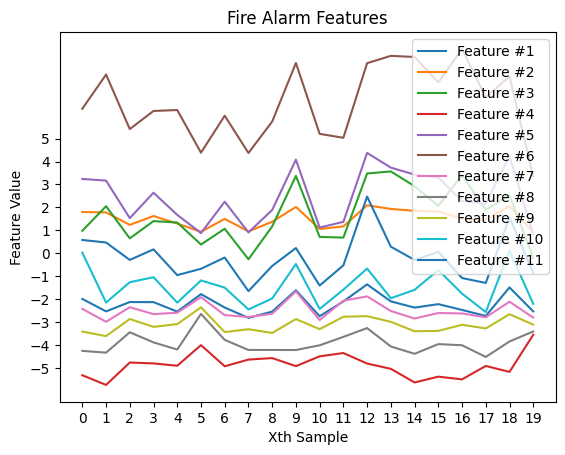

In [78]:
# Graph the features for each sample in each class
graph_features(windowed_features, ['music', 'vacuum', 'blender', 'silence', 'microwave', 'fire alarm'])

## Create Training Labels

In [64]:

#Assigning groundtruth conditions to each participant. 
windowed_music_labels      = [label_values['music']] * len(windowed_music_features)
print('Created windowed music labels')
windowed_vacuum_labels     = [label_values['vacuum']] * len(windowed_vacuum_features)
print('Created windowed vacuum labels')
windowed_blender_labels    = [label_values['blender']] * len(windowed_blender_features)
print('Created windowed blender labels')
windowed_silence_labels    = [label_values['silence']] * len(windowed_silence_features)
print('Created windowed silence labels')
windowed_microwave_labels  = [label_values['microwave']] * len(windowed_microwave_features)
print('Created windowed microwave labels')
windowed_fire_alarm_labels = [label_values['fire alarm']] * len(windowed_fire_alarm_features)
print('Created windowed fire alarm labels')

# This is the ground truth labels for the data
labels = np.concatenate((
    windowed_music_labels,
    windowed_vacuum_labels,
    windowed_blender_labels,
    windowed_silence_labels,
    windowed_microwave_labels,
    windowed_fire_alarm_labels
), axis=0)

print('Done👍')

Created windowed music labels
Created windowed vacuum labels
Created windowed blender labels
Created windowed silence labels
Created windowed microwave labels
Created windowed fire alarm labels
Done👍


## Train and Test a Classifier

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.3)

# Create the model
clf = SVC(kernel='poly', degree=5, gamma='auto')
# Train the model
clf.fit(xtrain, ytrain)
# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
print('Confusion Matrix:', cm, '\n', sep='\n')

# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

Average cross-validation score: 0.9305555555555556 

Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  2]]


Test Statistics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00        13
         3.0       0.80      1.00      0.89         4
         4.0       1.00      1.00      1.00         3
         5.0       1.00      0.67      0.80         3

    accuracy                           0.97        36
   macro avg       0.97      0.94      0.95        36
weighted avg       0.98      0.97      0.97        36



Testing Accuracy: 0.9722222222222222
Done👍


/home/adam/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


## Test Classifier On All Data

In [66]:
print('Checking windowed music files...')
check_files(music_files, 'music', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed vacuum files...')
check_files(vacuum_files, 'vacuum', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed blender files...')
check_files(blender_files, 'blender', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed silence files...')
check_files(silence_files, 'silence', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed microwave files...')
check_files(microwave_files, 'microwave', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)
print('Checking windowed fire alarm files...')
check_files(fire_alarm_files, 'fire alarm', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW, FFT_SIZE)

print('Done👍')

Checking windowed music files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 🎵 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking windowed vacuum files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 🧹 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking windowed blender files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ ⚙️ 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking windowed silence files...
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 🤫 
✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ ✅ 
------------------------------------------------------------
Checking windowed microwave fil

# Live Demo

In [21]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio
camera = CameraStream(constraints={'audio': True, 'video': False})
recorder = AudioRecorder(stream=camera, filename='recording.mp3', autosave=True)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), autosave=True, filename='recording.mp3', stream=CameraStr…

In [ ]:
!ffmpeg -i recording.mp3 -ac 1 -f wav livedemo.wav -y -hide_banner -loglevel panic
recorder.save()
print('Recording saved')
bins = bin_a_wav('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW)
plt.xlabel("Recorded spectrogram")
plt.pcolormesh(bins)
plt.show()
print('Prediction:', classify('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW))